In [1]:
# script that analyzes and computes figures for experimental data on PEX interactions
import db_utils
import AF_plot_functions
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq
from matplotlib import gridspec
import matplotlib
#matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
%matplotlib inline

from matplotlib.ticker import FormatStrFormatter

connect = db_utils.get_connection()
cursor = connect.cursor()

path = '/Users/luck/IMB/projects/AlphaFold/exp_data_analysis/'

In [2]:
def get_saturation_curve_data(project_id,NL_id,mCit_id,connect,FL_id):
    titration_query = f"""select a.project_id,a.NL_plasmid,a.mCit_plasmid,a.NL_property,a.mCit_property,
                c.measurement/d.measurement BRET,a.NL_plasmid_id,a.mCit_plasmid_id,a.plate_id,b.avg_FL,
                e.measurement totLu,a.well_id 
                from luthy_data.plate_layout a, luthy_data.FL_avg_points b, luthy_data.LU_raw c, 
                    luthy_data.LU_raw d, luthy_data.LU_raw e 
                where a.project_id='{project_id}' and a.include=1 and a.project_id=b.project_id and 
                    a.project_id=c.project_id and a.project_id=d.project_id and a.project_id=e.project_id and 
                    a.plate_id=b.plate_id and a.plate_id=c.plate_id and a.plate_id=d.plate_id and 
                    a.plate_id=e.plate_id and a.well_id=b.well_id and a.well_id=c.well_id and 
                    a.well_id=d.well_id and a.well_id=e.well_id and a.NL_plasmid_id='{NL_id}' and 
                    a.mCit_plasmid_id='{mCit_id}' and c.measurement_id='accLu01' and d.measurement_id='donLu01' 
                    and e.measurement_id='totLu01' and b.measurement_id='{FL_id}'"""
    bleedthrough_query = f"""select c.measurement/d.measurement bleedthrough,a.plate_id
                from luthy_data.plate_layout a, luthy_data.LU_raw c, luthy_data.LU_raw d
                where a.project_id='{project_id}' and a.include=1 and a.project_id=c.project_id and 
                    a.project_id=d.project_id and a.plate_id=c.plate_id and a.plate_id=d.plate_id and 
                    a.well_id=c.well_id and a.well_id=d.well_id and a.NL_plasmid_id='KL_03' and 
                    a.mCit_plasmid_id='empty' and c.measurement_id='accLu01' and d.measurement_id='donLu01'"""
    bkg_query = f"""select b.avg_FL bkg_FL,c.measurement bkg_LU,a.plate_id
                    from luthy_data.plate_layout a, luthy_data.FL_avg_points b, luthy_data.LU_raw c 
                    where a.project_id='{project_id}' and a.include=1 and a.project_id=b.project_id and 
                        a.project_id=c.project_id and a.plate_id=b.plate_id and a.plate_id=c.plate_id and 
                        a.well_id=b.well_id and a.well_id=c.well_id and a.NL_plasmid_id='KL_01' and 
                        a.mCit_plasmid_id='empty' and b.measurement_id='{FL_id}' and c.measurement_id='totLu01'"""

    BRET_df = pandas.read_sql(titration_query,connect)
    BT_df = pandas.read_sql(bleedthrough_query,connect)
#    print(BT_df)
    bkg_df = pandas.read_sql(bkg_query,connect)
#    print(bkg_df)
    
    BRET_df['norm_BRET'] = BRET_df['BRET'] - np.mean(list(BT_df['bleedthrough']))
    BRET_df['expr_ratio'] = (BRET_df['avg_FL'] - np.mean(list(bkg_df['bkg_FL'])))/(BRET_df['totLu'] - np.mean(list(bkg_df['bkg_LU'])))
#    print(BRET_df)
    
    return BRET_df

('KL_777', 'KL_784', 'Lu134r01', 'FL01')
('KL_821', 'KL_784', 'Lu134r01', 'FL01')
('KL_777', 'KL_827', 'Lu134r01', 'FL01')


/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/413438855.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BRET_df = pandas.read_sql(titration_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/413438855.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BT_df = pandas.read_sql(bleedthrough_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/413438855.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bkg_df = pandas.read_sql(bkg_query,connect

('KL_777', 'KL_784', 'Lu134r01', 'FL01')
('KL_813', 'KL_784', 'Lu134r01', 'FL01')
('KL_814', 'KL_784', 'Lu134r01', 'FL01')
['PEX3 - PEX19', 'PEX3 - PEX19', 'PEX3 - PEX19', 'PEX3_T90Q - PEX19', 'PEX3_T90Q - PEX19', 'PEX3_T90Q - PEX19', 'PEX3 - PEX19_F29K', 'PEX3 - PEX19_F29K', 'PEX3 - PEX19_F29K', 'PEX3 - PEX19', 'PEX3 - PEX19', 'PEX3 - PEX19', 'PEX3_R54S - PEX19', 'PEX3_R54S - PEX19', 'PEX3_R54S - PEX19', 'PEX3_E272R - PEX19', 'PEX3_E272R - PEX19', 'PEX3_E272R - PEX19']


/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/2242044429.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bret_expr_df = bret_expr_df.append(BRET_df,ignore_index=True)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/2242044429.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bret50_df = bret50_df.append({'pair':pair_label,'project_id':plasmid_pair[2],'plate_id':plate_id,
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/2242044429.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bret50_df = bret50_df.append({'pair':pair_label,'project_id':plasmid_pair[2],'plate_id':plate_id,
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/2242044429.py:102: Fu

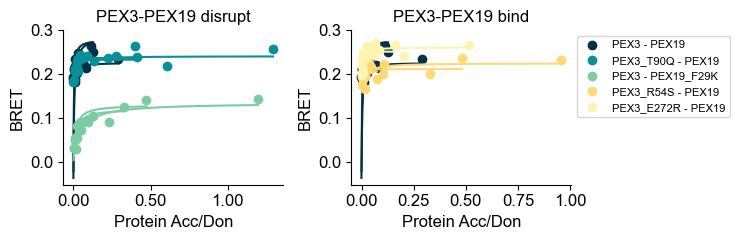

In [51]:
# plot titration curves, fit the data and compute BRET 50
plasmid_pair_sets = [
               [('KL_777','KL_784','Lu134r01','FL01'),
                 ('KL_821','KL_784','Lu134r01','FL01'),('KL_777','KL_827','Lu134r01','FL01')],               
#                 ('KL_812','KL_784','Lu134r01','FL01')],
               [('KL_777','KL_784','Lu134r01','FL01'),('KL_813','KL_784','Lu134r01','FL01'),
                 ('KL_814','KL_784','Lu134r01','FL01')]
                    ]

labels_colors = {('KL_777','KL_784'):('PEX3 - PEX19','#003147'),
          ('KL_821','KL_784'):('PEX3_T90Q - PEX19','#089099'),
          ('KL_777','KL_827'):('PEX3 - PEX19_F29K','#7CCBA2'),
          ('KL_812','KL_784'):('PEX3_L107D - PEX19','#B7E6A5'),
          ('KL_813','KL_784'):('PEX3_R54S - PEX19','#FED976'),
          ('KL_814','KL_784'):('PEX3_E272R - PEX19','#FFF3B2'),
          ('KL_777','KL_787'):('PEX3 - PEX16','#B10026'),
          ('KL_777','KL_810'):('PEX3 - PEX16_K169A','#E31A1C'),
          ('KL_777','KL_822'):('PEX3 - PEX16_W189G','#FC4E2A'),
          ('KL_777','KL_831'):('PEX3 - PEX16_del','#FD8D3C'),
          ('KL_813','KL_787'):('PEX3_R54S - PEX16','#FED976'),
          ('KL_814','KL_787'):('PEX3_E272R - PEX16','#FFF3B2'),
          ('KL_812','KL_787'):('PEX3_L107D - PEX16','#B7E6A5'),
          }


titles = ['PEX3-PEX19 disrupt','PEX3-PEX19 bind']

# create dict where data is safed
fit_dict = {}

# create df to save BRET50 and BRETmax
bret50_df = pandas.DataFrame({'pair':[],'project_id':[],'plate_id':[],'bret50':[],'bret50_err':[],'bretmax':[],
                              'bretmax_err':[],'color':[],'NL_plasmid_id':[],'mCit_plasmid_id':[]})

# create df to save BRET values and avg expression values
bret_expr_df = pandas.DataFrame({'project_id':[],'NL_plasmid':[],'mCit_plasmid':[],'NL_property':[],'mCit_property':[],
                                 'BRET':[],'NL_plasmid_id':[],'mCit_plasmid_id':[],'plate_id':[],
                                 'avg_FL':[],'totLu':[],'norm_BRET':[],'expr_ratio':[]})
#set the size of the figure plot
plt.figure(figsize=(7.5,2.5))

artist_collection = []
labels_collection = []

for p,plasmid_pairs in enumerate(plasmid_pair_sets):

    plt.subplot(1,2,p+1)

    for i,plasmid_pair in enumerate(plasmid_pairs):
        print(plasmid_pair)
        pair_label = labels_colors[(plasmid_pair[0],plasmid_pair[1])][0]
        pair_color = labels_colors[(plasmid_pair[0],plasmid_pair[1])][1]
        BRET_df = get_saturation_curve_data(plasmid_pair[2],plasmid_pair[0],plasmid_pair[1],connect,plasmid_pair[3])
        BRET_df.sort_values(['plate_id','expr_ratio'],inplace=True)
#        print(BRET_df)
        bret_expr_df = bret_expr_df.append(BRET_df,ignore_index=True)
        plate_ids = list(set(list(BRET_df['plate_id'])))
#        print(plate_ids)
        
        for plate_id in plate_ids:

            sub_df = BRET_df.loc[BRET_df['plate_id']==plate_id,['expr_ratio','norm_BRET']].reset_index()
            adr_list = sub_df['expr_ratio']
            bret_list = sub_df['norm_BRET']
            # here, create lambda function to define the equation that describes the saturation curve
            func = lambda par,adr : par[0]*adr/(par[1] + adr)
            # ErrorFunc is the diference between the func and the y "experimental" data
            ErrorFunc = lambda par,adr,bret: func(par,adr)-bret
            #tplInitial contains the "first guess" of the parameters 
            Initial1 = (bret_list[len(bret_list)-1],0.01)
            # leastsq finds the parameter bret_max and kd that minimize ErrorFunc=yfit-yExperimental
            #JMS: Changed below line to output all objects from leastsq() - of interest is 'pcov'
            final,pcov,lsdict,lsmesg,success=leastsq(ErrorFunc,Initial1,args=(adr_list,bret_list),full_output=True)
            xx1=np.linspace(adr_list.min(),adr_list.max(),50)
            yy1=func(final,xx1)
            bret_max = final[0]
            bret50 = final[1]

            # JMS: Compute std err for bret50 (according to statistical estimate of error for an estimated parameter)
            #      Calculate residual variance
            s_sq = (ErrorFunc(final,adr_list,bret_list)**2).sum()/(len(bret_list)-len(final))
            #      Multiply residual variance by fractional covariance matrix supplied by leastsq() <- this is the variance-covariance matrix
            pcov = s_sq * pcov
            #      Extract standard error: square root of values along the diagonal of variance-covariance matrix
            sterr_bret50 = (np.absolute(pcov[1][1]))**(1/2)
            sterr_bretmax = (np.absolute(pcov[0][0]))**(1/2)

            # safe data in dict
            xx1_l = xx1.tolist()
            yy1_l = yy1.tolist()
            plasmid_name = "__".join(plasmid_pair)
            data_x_y = {"experiment_name":pair_label,"data" : {"x" : xx1_l, "y": yy1_l}}
            fit_dict[plasmid_name] = data_x_y

            # plot titration curve
            line1 = plt.plot(adr_list,bret_list,linestyle='',color=pair_color,marker='o',label=pair_label)
            # plot fit line
            xx1=np.linspace(adr_list.min(),adr_list.max(),50)
            yy1=func(final,xx1)
            plt.plot(xx1,yy1,linestyle='-',color=pair_color)

            bret50_df = bret50_df.append({'pair':pair_label,'project_id':plasmid_pair[2],'plate_id':plate_id,
                                          'bret50':bret50,'bret50_err':sterr_bret50,'bretmax':bret_max,
                                          'bretmax_err':sterr_bretmax,'color':pair_color,
                                          'NL_plasmid_id':plasmid_pair[0],'mCit_plasmid_id':plasmid_pair[1]},
                                          ignore_index=True)

    plt.title(titles[p],fontsize=12)
    plt.xlabel('Protein Acc/Don',fontsize=12)
    plt.ylabel('BRET',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(top=0.3)
#     if p == 0:
#         plt.xlim((-0.02,3))
    ax = plt.gca()
    if p in [0,1]:
        handles, labels = ax.get_legend_handles_labels()
        artist_collection = artist_collection + handles
        labels_collection = labels_collection + labels
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.spines[['right', 'top']].set_visible(False)
    plt.tight_layout()
    
artist_collection_final = []
labels_collection_final = []

print(labels_collection)
for i in [0,3,6,12,15]:
    artist_collection_final.append(artist_collection[i])
    labels_collection_final.append(labels_collection[i])


plt.legend(handles=artist_collection_final,labels=labels_collection_final,bbox_to_anchor=(1,1), fontsize=8)
plt.tight_layout()

df = pandas.DataFrame.from_dict(fit_dict)

plt.savefig(path+'PEX3_PEX19_titration_indiv_Lu134r01.pdf')
plt.savefig(path+'PEX3_PEX19_titration_indiv_Lu134r01.jpeg',dpi=300)
plt.show()

In [14]:
bret50_df

,pair,project_id,plate_id,bret50,bret50_err,bretmax,bretmax_err,color,NL_plasmid_id,mCit_plasmid_id
0,PEX3 - PEX19,Lu134r01,1.0,0.002634,0.004340,0.279296,0.079017,#003147,KL_777,KL_784
1,PEX3 - PEX19,Lu134r01,2.0,0.002022,0.000520,0.226135,0.005756,#003147,KL_777,KL_784
2,PEX3 - PEX19,Lu134r01,3.0,0.005934,0.010435,0.285747,0.113332,#003147,KL_777,KL_784
3,PEX3_T90Q - PEX19,Lu134r01,1.0,-0.000073,0.000037,0.236982,0.008644,#089099,KL_821,KL_784
4,PEX3_T90Q - PEX19,Lu134r01,2.0,0.003768,0.001733,0.241397,0.008558,#089099,KL_821,KL_784
5,PEX3_T90Q - PEX19,Lu134r01,3.0,0.000520,0.000159,0.233673,0.005631,#089099,KL_821,KL_784
6,PEX3 - PEX19_F29K,Lu134r01,1.0,0.014299,0.007187,0.121042,0.015387,#7CCBA2,KL_777,KL_827
7,PEX3 - PEX19_F29K,Lu134r01,2.0,0.045109,0.014075,0.134859,0.012267,#7CCBA2,KL_777,KL_827
8,PEX3 - PEX19_F29K,Lu134r01,3.0,0.013501,0.004077,0.130586,0.009571,#7CCBA2,KL_777,KL_827
9,PEX3 - PEX19,Lu134r01,1.0,0.002634,0.004340,0.279296,0.079017,#003147,KL_777,KL_784


In [41]:
bret_expr_df.to_csv(path + 'PEX3_PEX19_PEX16_bret_expr_df.tsv',sep='\t')

('KL_777', 'KL_784', 'Lu134r01', 'FL01')
   project_id             NL_plasmid               mCit_plasmid NL_property  \
2    Lu134r01  pcDNA3.1 PEX3-NL-cmyc  pcDNA3.1 PEX19-His3C-mCit         8ng   
8    Lu134r01  pcDNA3.1 PEX3-NL-cmyc  pcDNA3.1 PEX19-His3C-mCit         8ng   
14   Lu134r01  pcDNA3.1 PEX3-NL-cmyc  pcDNA3.1 PEX19-His3C-mCit         8ng   
56   Lu134r01  pcDNA3.1 PEX3-NL-cmyc  pcDNA3.1 PEX19-His3C-mCit         8ng   
62   Lu134r01  pcDNA3.1 PEX3-NL-cmyc  pcDNA3.1 PEX19-His3C-mCit         8ng   
68   Lu134r01  pcDNA3.1 PEX3-NL-cmyc  pcDNA3.1 PEX19-His3C-mCit         8ng   

   mCit_property    BRET NL_plasmid_id mCit_plasmid_id  plate_id  avg_FL  \
2           50ng  0.5266        KL_777          KL_784       1.0  2451.2   
8           50ng  0.4934        KL_777          KL_784       2.0  3716.5   
14          50ng  0.5101        KL_777          KL_784       3.0  2098.8   
56          50ng  0.5266        KL_777          KL_784       1.0  2451.2   
62          50ng  0.4934 

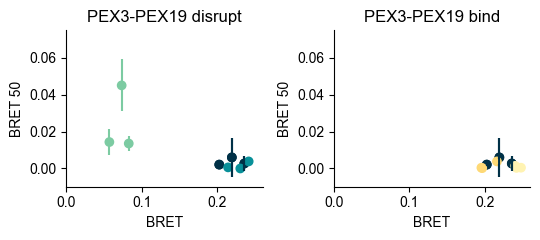

In [17]:
# plot the scatter plot BRET50 vs BRET
plt.figure(figsize=(5.5,2.5))

for p,plasmid_pairs in enumerate(plasmid_pair_sets):

    plt.subplot(1,2,p+1)
    BRET_values = []
    BRET50_std = []
    BRET_50_values = []
    colors = []

    for plasmid_pair in plasmid_pairs:
        print(plasmid_pair)
        if plasmid_pair[2] == 'Lu128r01':
            NL_prop = '2ng'
        else:
            NL_prop = '8ng'
        BRET_values = BRET_values + list(bret_expr_df.loc[(bret_expr_df['NL_property']==NL_prop) & 
                                          (bret_expr_df['mCit_property']=='50ng') & 
                                          (bret_expr_df['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (bret_expr_df['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (bret_expr_df['project_id']==plasmid_pair[2]),'norm_BRET'])

        print(bret_expr_df.loc[(bret_expr_df['NL_property']==NL_prop) & 
                                          (bret_expr_df['mCit_property']=='50ng') & 
                                          (bret_expr_df['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (bret_expr_df['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (bret_expr_df['project_id']==plasmid_pair[2])])
        
        BRET_50_values = BRET_50_values + list(bret50_df.loc[(bret50_df['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (bret50_df['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (bret50_df['project_id']==plasmid_pair[2]),'bret50'])

        BRET50_std = BRET50_std + list(bret50_df.loc[(bret50_df['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (bret50_df['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (bret50_df['project_id']==plasmid_pair[2]),'bret50_err'])
 
        colors = colors + list(bret50_df.loc[(bret50_df['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (bret50_df['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (bret50_df['project_id']==plasmid_pair[2]),'color'])

    print(len(BRET_values))
    print(len(BRET_50_values))
    plt.errorbar(BRET_values,BRET_50_values,yerr=BRET50_std,marker='',linestyle='',ecolor=colors)
    plt.scatter(BRET_values,BRET_50_values,marker='o',color=colors)
    plt.title(titles[p],fontsize=12)
    plt.ylabel('BRET 50',fontsize=10)
    plt.xlabel('BRET',fontsize=10)
    plt.xlim((0,0.26))
    plt.ylim((-0.01,0.075))
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.savefig(path+'PEX3_PEX19_BRET50err_vs_BRET_Lu134r01.pdf')
plt.savefig(path+'PEX3_PEX19_BRET50err_vs_BRET_Lu134r01.jpeg',dpi=300)
plt.show()

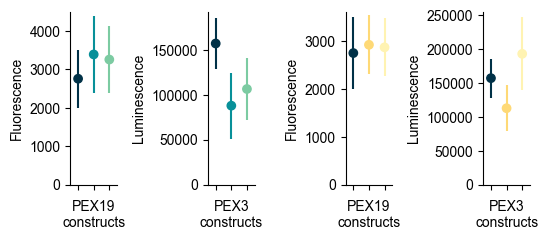

In [52]:
# plot the expression values for both partner proteins

plt.figure(figsize=(5.5,2.5))

avgFL_gr = bret_expr_df.groupby(['project_id','NL_plasmid_id','mCit_plasmid_id','NL_property','mCit_property'])['avg_FL'].aggregate(['mean','std']).reset_index()
avgLU_gr = bret_expr_df.groupby(['project_id','NL_plasmid_id','mCit_plasmid_id','NL_property','mCit_property'])['totLu'].aggregate(['mean','std']).reset_index()

for p,plasmid_pairs in enumerate(plasmid_pair_sets):

    plt.subplot(1,4,p*2+1)
    FL_values = []
    FL_std = []
    colors = []

    for plasmid_pair in plasmid_pairs:
        FL_values.append(list(avgFL_gr.loc[(avgFL_gr['NL_property']=='8ng') & 
                                          (avgFL_gr['mCit_property']=='50ng') & 
                                          (avgFL_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgFL_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgFL_gr['project_id']==plasmid_pair[2]),'mean'])[0])

        FL_std.append(list(avgFL_gr.loc[(avgFL_gr['NL_property']=='8ng') & 
                                          (avgFL_gr['mCit_property']=='50ng') & 
                                          (avgFL_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgFL_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgFL_gr['project_id']==plasmid_pair[2]),'std'])[0])
 
        colors.append(labels_colors[(plasmid_pair[0],plasmid_pair[1])][1])

    plt.errorbar(range(len(FL_values)),FL_values,yerr=FL_std,marker='',linestyle='',ecolor=colors)
    plt.scatter(range(len(FL_values)),FL_values,marker='o',color=colors)
    plt.ylabel('Fluorescence',fontsize=10)
    plt.xlabel('PEX19\nconstructs',fontsize=10)
    plt.ylim(bottom=0)
    plt.xlim(-0.5,len(FL_values)-0.5)
    plt.xticks(range(len(FL_values)),'')
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)


    plt.subplot(1,4,p*2+2)
    LU_values = []
    LU_std = []

    for plasmid_pair in plasmid_pairs:
        LU_values.append(list(avgLU_gr.loc[(avgLU_gr['NL_property']=='8ng') & 
                                          (avgLU_gr['mCit_property']=='50ng') & 
                                          (avgLU_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgLU_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgLU_gr['project_id']==plasmid_pair[2]),'mean'])[0])

        LU_std.append(list(avgLU_gr.loc[(avgLU_gr['NL_property']=='8ng') & 
                                          (avgLU_gr['mCit_property']=='50ng') & 
                                          (avgLU_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgLU_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgLU_gr['project_id']==plasmid_pair[2]),'std'])[0])
 

    plt.errorbar(range(len(LU_values)),LU_values,yerr=LU_std,marker='',linestyle='',ecolor=colors)
    plt.scatter(range(len(LU_values)),LU_values,marker='o',color=colors)
    plt.ylabel('Luminescence',fontsize=10)
    plt.xlabel('PEX3\nconstructs',fontsize=10)
    plt.xticks(range(len(LU_values)),'')
    plt.ylim(bottom=0)
    plt.xlim(-0.5,len(LU_values)-0.5)
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)

    
plt.tight_layout()
plt.savefig(path+'PEX3_PEX19_expr_Lu134r01.pdf')
plt.savefig(path+'PEX3_PEX19_expr_Lu134r01.jpeg',dpi=300)
plt.show()

/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/3615571688.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.sort_values('mean_x',inplace=True)


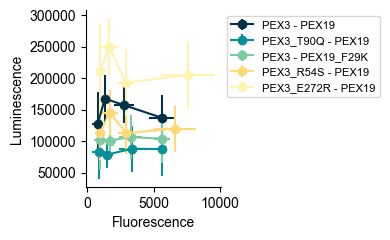

In [61]:
plasmid_pair_sets = [
               [('KL_777','KL_784','Lu134r01','FL01'),
                 ('KL_821','KL_784','Lu134r01','FL01'),('KL_777','KL_827','Lu134r01','FL01'),               
               ('KL_813','KL_784','Lu134r01','FL01'),('KL_814','KL_784','Lu134r01','FL01')]
                    ]

avg_expr_df = avgFL_gr.merge(avgLU_gr,on=['project_id','NL_plasmid_id','mCit_plasmid_id','NL_property','mCit_property'])
avg_expr_df.drop(avg_expr_df.loc[avg_expr_df['NL_property']=='4ng',].index,inplace=True)
plt.figure(figsize=(4,2.5))
for plasmid_pair in plasmid_pair_sets[0]:
    sub_df = avg_expr_df.loc[(avg_expr_df['project_id']==plasmid_pair[2]) & 
                             (avg_expr_df['NL_plasmid_id']==plasmid_pair[0]) & 
                             (avg_expr_df['mCit_plasmid_id']==plasmid_pair[1]),]
    sub_df.sort_values('mean_x',inplace=True)
    color = labels_colors[(plasmid_pair[0],plasmid_pair[1])][1]
    label = labels_colors[(plasmid_pair[0],plasmid_pair[1])][0]
    plt.errorbar(sub_df['mean_x'],sub_df['mean_y'],xerr=sub_df['std_x'],yerr=sub_df['std_y'],
                 marker='o',color=color,label=label)

plt.ylabel('Luminescence',fontsize=10)
plt.xlabel('Fluorescence',fontsize=10)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

plt.legend(bbox_to_anchor=(1,1),fontsize=8)
plt.tight_layout()
plt.savefig(path+'PEX3_PEX19_LUvsFL_Lu134r01.pdf')
plt.savefig(path+'PEX3_PEX19_LUvsFL_Lu134r01.jpeg',dpi=300)
plt.show()

In [58]:
avg_expr_df

,project_id,NL_plasmid_id,mCit_plasmid_id,NL_property,mCit_property,mean_x,std_x,mean_y,std_y
0,Lu134r01,KL_777,KL_784,4ng,100ng,5411.000000,1162.761898,101337.000000,21158.660147
1,Lu134r01,KL_777,KL_784,4ng,200ng,12803.366667,1830.266661,84358.333333,26015.182618
2,Lu134r01,KL_777,KL_784,8ng,100ng,5649.266667,973.151011,136622.333333,37014.925058
3,Lu134r01,KL_777,KL_784,8ng,12.5ng,766.066667,427.603193,126883.000000,50471.896077
4,Lu134r01,KL_777,KL_784,8ng,25ng,1316.000000,451.897900,167358.000000,37729.535635
5,Lu134r01,KL_777,KL_784,8ng,50ng,2755.500000,760.887477,156960.333333,28603.458173
6,Lu134r01,KL_777,KL_827,4ng,100ng,5660.866667,656.176511,43105.000000,13537.712251
7,Lu134r01,KL_777,KL_827,4ng,200ng,11562.066667,1309.289675,26708.666667,12320.478089
8,Lu134r01,KL_777,KL_827,8ng,100ng,5622.400000,575.562707,103662.333333,39098.209477
9,Lu134r01,KL_777,KL_827,8ng,12.5ng,956.833333,498.742642,101764.333333,47782.705138


('KL_777', 'KL_787', 'Lu134r01', 'FL01')
('KL_777', 'KL_810', 'Lu134r01', 'FL01')
('KL_777', 'KL_822', 'Lu134r01', 'FL01')
('KL_777', 'KL_831', 'Lu134r01', 'FL01')


/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/413438855.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BRET_df = pandas.read_sql(titration_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/413438855.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  BT_df = pandas.read_sql(bleedthrough_query,connect)
/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/413438855.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bkg_df = pandas.read_sql(bkg_query,connect

('KL_813', 'KL_787', 'Lu134r01', 'FL01')
('KL_814', 'KL_787', 'Lu134r01', 'FL01')
['PEX3 - PEX16', 'PEX3 - PEX16', 'PEX3 - PEX16', 'PEX3 - PEX16_K169A', 'PEX3 - PEX16_K169A', 'PEX3 - PEX16_K169A', 'PEX3 - PEX16_W189G', 'PEX3 - PEX16_W189G', 'PEX3 - PEX16_W189G', 'PEX3 - PEX16_del', 'PEX3 - PEX16_del', 'PEX3 - PEX16_del', 'PEX3_R54S - PEX16', 'PEX3_R54S - PEX16', 'PEX3_R54S - PEX16', 'PEX3_E272R - PEX16', 'PEX3_E272R - PEX16', 'PEX3_E272R - PEX16']


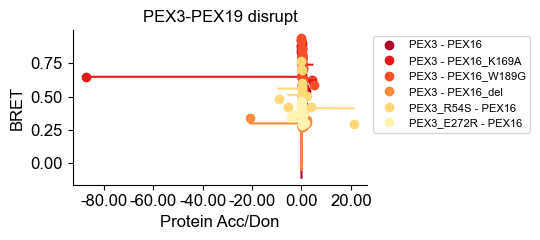

In [64]:
# get the bret_expr_df
plasmid_pair_sets = [
               [('KL_777','KL_787','Lu134r01','FL01'),
                 ('KL_777','KL_810','Lu134r01','FL01'),('KL_777','KL_822','Lu134r01','FL01'),
                ('KL_777','KL_831','Lu134r01','FL01'),('KL_813','KL_787','Lu134r01','FL01'),
                ('KL_814','KL_787','Lu134r01','FL01')]
                    ]

# create df to save BRET values and avg expression values
bret_expr_df = pandas.DataFrame({'project_id':[],'NL_plasmid':[],'mCit_plasmid':[],'NL_property':[],'mCit_property':[],
                                 'BRET':[],'NL_plasmid_id':[],'mCit_plasmid_id':[],'plate_id':[],
                                 'avg_FL':[],'totLu':[],'norm_BRET':[],'expr_ratio':[]})

# create dict where data is safed
fit_dict = {}

# create df to save BRET50 and BRETmax
bret50_df = pandas.DataFrame({'pair':[],'project_id':[],'plate_id':[],'bret50':[],'bret50_err':[],'bretmax':[],
                              'bretmax_err':[],'color':[],'NL_plasmid_id':[],'mCit_plasmid_id':[]})

# create df to save BRET values and avg expression values
bret_expr_df = pandas.DataFrame({'project_id':[],'NL_plasmid':[],'mCit_plasmid':[],'NL_property':[],'mCit_property':[],
                                 'BRET':[],'NL_plasmid_id':[],'mCit_plasmid_id':[],'plate_id':[],
                                 'avg_FL':[],'totLu':[],'norm_BRET':[],'expr_ratio':[]})
#set the size of the figure plot
plt.figure(figsize=(5.5,2.5))

artist_collection = []
labels_collection = []

for p,plasmid_pairs in enumerate(plasmid_pair_sets):

    plt.subplot(1,1,p+1)

    for i,plasmid_pair in enumerate(plasmid_pairs):
        print(plasmid_pair)
        pair_label = labels_colors[(plasmid_pair[0],plasmid_pair[1])][0]
        pair_color = labels_colors[(plasmid_pair[0],plasmid_pair[1])][1]
        BRET_df = get_saturation_curve_data(plasmid_pair[2],plasmid_pair[0],plasmid_pair[1],connect,plasmid_pair[3])
        BRET_df.sort_values(['plate_id','expr_ratio'],inplace=True)
#        print(BRET_df)
        bret_expr_df = bret_expr_df.append(BRET_df,ignore_index=True)
        plate_ids = list(set(list(BRET_df['plate_id'])))
#        print(plate_ids)
        
        for plate_id in plate_ids:

            sub_df = BRET_df.loc[BRET_df['plate_id']==plate_id,['expr_ratio','norm_BRET']].reset_index()
            adr_list = sub_df['expr_ratio']
            bret_list = sub_df['norm_BRET']
            # here, create lambda function to define the equation that describes the saturation curve
            func = lambda par,adr : par[0]*adr/(par[1] + adr)
            # ErrorFunc is the diference between the func and the y "experimental" data
            ErrorFunc = lambda par,adr,bret: func(par,adr)-bret
            #tplInitial contains the "first guess" of the parameters 
            Initial1 = (bret_list[len(bret_list)-1],0.01)
            # leastsq finds the parameter bret_max and kd that minimize ErrorFunc=yfit-yExperimental
            #JMS: Changed below line to output all objects from leastsq() - of interest is 'pcov'
            final,pcov,lsdict,lsmesg,success=leastsq(ErrorFunc,Initial1,args=(adr_list,bret_list),full_output=True)
            xx1=np.linspace(adr_list.min(),adr_list.max(),50)
            yy1=func(final,xx1)
            bret_max = final[0]
            bret50 = final[1]

            # JMS: Compute std err for bret50 (according to statistical estimate of error for an estimated parameter)
            #      Calculate residual variance
            s_sq = (ErrorFunc(final,adr_list,bret_list)**2).sum()/(len(bret_list)-len(final))
            #      Multiply residual variance by fractional covariance matrix supplied by leastsq() <- this is the variance-covariance matrix
            pcov = s_sq * pcov
            #      Extract standard error: square root of values along the diagonal of variance-covariance matrix
            sterr_bret50 = (np.absolute(pcov[1][1]))**(1/2)
            sterr_bretmax = (np.absolute(pcov[0][0]))**(1/2)

            # safe data in dict
            xx1_l = xx1.tolist()
            yy1_l = yy1.tolist()
            plasmid_name = "__".join(plasmid_pair)
            data_x_y = {"experiment_name":pair_label,"data" : {"x" : xx1_l, "y": yy1_l}}
            fit_dict[plasmid_name] = data_x_y

            # plot titration curve
            line1 = plt.plot(adr_list,bret_list,linestyle='',color=pair_color,marker='o',label=pair_label)
            # plot fit line
            xx1=np.linspace(adr_list.min(),adr_list.max(),50)
            yy1=func(final,xx1)
            plt.plot(xx1,yy1,linestyle='-',color=pair_color)

            bret50_df = bret50_df.append({'pair':pair_label,'project_id':plasmid_pair[2],'plate_id':plate_id,
                                          'bret50':bret50,'bret50_err':sterr_bret50,'bretmax':bret_max,
                                          'bretmax_err':sterr_bretmax,'color':pair_color,
                                          'NL_plasmid_id':plasmid_pair[0],'mCit_plasmid_id':plasmid_pair[1]},
                                          ignore_index=True)

    plt.title(titles[p],fontsize=12)
    plt.xlabel('Protein Acc/Don',fontsize=12)
    plt.ylabel('BRET',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
#    plt.ylim(top=0.3)
#     if p == 0:
#         plt.xlim((-0.02,3))
    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    artist_collection = artist_collection + handles
    labels_collection = labels_collection + labels
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.spines[['right', 'top']].set_visible(False)
    plt.tight_layout()
    
artist_collection_final = []
labels_collection_final = []

print(labels_collection)
for i in [0,3,6,9,12,15]:
    artist_collection_final.append(artist_collection[i])
    labels_collection_final.append(labels_collection[i])


plt.legend(handles=artist_collection_final,labels=labels_collection_final,bbox_to_anchor=(1,1), fontsize=8)
plt.tight_layout()

df = pandas.DataFrame.from_dict(fit_dict)

plt.savefig(path+'PEX3_PEX16_titration_indiv_Lu134r01.pdf')
plt.savefig(path+'PEX3_PEX16_titration_indiv_Lu134r01.jpeg',dpi=300)
plt.show()

  project_id             NL_plasmid               mCit_plasmid NL_property  \
1   Lu134r01  pcDNA3.1 PEX3-NL-cmyc  pcDNA3.1 PEX16-His3C-mCit         8ng   

  mCit_property    BRET NL_plasmid_id mCit_plasmid_id  plate_id  avg_FL  \
1          25ng  1.1902        KL_777          KL_787       1.0  1019.2   

     totLu  norm_BRET  expr_ratio well_id  
1  83830.0   0.899467    0.006168      F2  
  project_id             NL_plasmid               mCit_plasmid NL_property  \
7   Lu134r01  pcDNA3.1 PEX3-NL-cmyc  pcDNA3.1 PEX16-His3C-mCit         8ng   

  mCit_property    BRET NL_plasmid_id mCit_plasmid_id  plate_id  avg_FL  \
7          25ng  1.0066        KL_777          KL_787       2.0  1820.5   

     totLu  norm_BRET  expr_ratio well_id  
7  38486.0   0.715867     0.03846      F2  
   project_id             NL_plasmid               mCit_plasmid NL_property  \
13   Lu134r01  pcDNA3.1 PEX3-NL-cmyc  pcDNA3.1 PEX16-His3C-mCit         8ng   

   mCit_property   BRET NL_plasmid_id mCit_plasmi

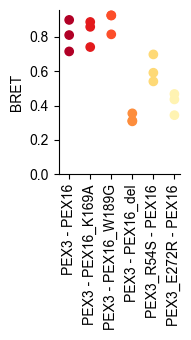

In [65]:
# plot the BRET values for the 8:25 transfection ratio
bret_expr_df.head()
labels = []
bret = []
x_num = []
plate_ids = [1,2,3]
colors = []
for p,plasmid_pairs in enumerate(plasmid_pair_sets[0]):
    for plate_id in plate_ids:
        print(bret_expr_df.loc[(bret_expr_df['NL_plasmid_id']==plasmid_pairs[0]) & 
                         (bret_expr_df['mCit_plasmid_id']==plasmid_pairs[1]) & 
                         (bret_expr_df['project_id']==plasmid_pairs[2]) & 
                         (bret_expr_df['NL_property']=='8ng') & 
                         (bret_expr_df['mCit_property']=='25ng') & 
                         (bret_expr_df['plate_id']==plate_id)])
        bret.append(list(bret_expr_df.loc[(bret_expr_df['NL_plasmid_id']==plasmid_pairs[0]) & 
                         (bret_expr_df['mCit_plasmid_id']==plasmid_pairs[1]) & 
                         (bret_expr_df['project_id']==plasmid_pairs[2]) & 
                         (bret_expr_df['NL_property']=='8ng') & 
                         (bret_expr_df['mCit_property']=='25ng') & 
                         (bret_expr_df['plate_id']==plate_id),'norm_BRET'])[0])
        colors.append(labels_colors[(plasmid_pairs[0],plasmid_pairs[1])][1])
        x_num.append(p)
    labels.append(labels_colors[(plasmid_pairs[0],plasmid_pairs[1])][0])

plt.figure(figsize=(2,3.5))
plt.scatter(x_num,bret,marker='o',color=colors)
plt.ylabel('BRET',fontsize=10)
plt.ylim(bottom=0)
plt.xlim(left=-0.5)
plt.xticks(range(len(labels)),labels,fontsize=10,rotation=90)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.savefig(path+'PEX3_PEX16_BRET_Lu134r01.pdf')
plt.savefig(path+'PEX3_PEX16_BRET_Lu134r01.jpeg',dpi=300)
plt.show()


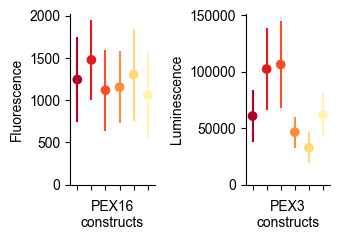

In [66]:
plt.figure(figsize=(3.5,2.5))

avgFL_gr = bret_expr_df.groupby(['project_id','NL_plasmid_id','mCit_plasmid_id','NL_property','mCit_property'])['avg_FL'].aggregate(['mean','std']).reset_index()
avgLU_gr = bret_expr_df.groupby(['project_id','NL_plasmid_id','mCit_plasmid_id','NL_property','mCit_property'])['totLu'].aggregate(['mean','std']).reset_index()

for p,plasmid_pairs in enumerate(plasmid_pair_sets):

    plt.subplot(1,2,p*2+1)
    FL_values = []
    FL_std = []
    colors = []

    for plasmid_pair in plasmid_pairs:
        FL_values.append(list(avgFL_gr.loc[(avgFL_gr['NL_property']=='8ng') & 
                                          (avgFL_gr['mCit_property']=='25ng') & 
                                          (avgFL_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgFL_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgFL_gr['project_id']==plasmid_pair[2]),'mean'])[0])

        FL_std.append(list(avgFL_gr.loc[(avgFL_gr['NL_property']=='8ng') & 
                                          (avgFL_gr['mCit_property']=='25ng') & 
                                          (avgFL_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgFL_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgFL_gr['project_id']==plasmid_pair[2]),'std'])[0])
 
        colors.append(labels_colors[(plasmid_pair[0],plasmid_pair[1])][1])

    plt.errorbar(range(len(FL_values)),FL_values,yerr=FL_std,marker='',linestyle='',ecolor=colors)
    plt.scatter(range(len(FL_values)),FL_values,marker='o',color=colors)
    plt.ylabel('Fluorescence',fontsize=10)
    plt.xlabel('PEX16\nconstructs',fontsize=10)
    plt.ylim(bottom=0)
    plt.xlim(-0.5,len(FL_values)-0.5)
    plt.xticks(range(len(FL_values)),'')
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)


    plt.subplot(1,2,p*2+2)
    LU_values = []
    LU_std = []

    for plasmid_pair in plasmid_pairs:
        LU_values.append(list(avgLU_gr.loc[(avgLU_gr['NL_property']=='8ng') & 
                                          (avgLU_gr['mCit_property']=='25ng') & 
                                          (avgLU_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgLU_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgLU_gr['project_id']==plasmid_pair[2]),'mean'])[0])

        LU_std.append(list(avgLU_gr.loc[(avgLU_gr['NL_property']=='8ng') & 
                                          (avgLU_gr['mCit_property']=='25ng') & 
                                          (avgLU_gr['NL_plasmid_id']==plasmid_pair[0]) & 
                                          (avgLU_gr['mCit_plasmid_id']==plasmid_pair[1]) & 
                                          (avgLU_gr['project_id']==plasmid_pair[2]),'std'])[0])
 

    plt.errorbar(range(len(LU_values)),LU_values,yerr=LU_std,marker='',linestyle='',ecolor=colors)
    plt.scatter(range(len(LU_values)),LU_values,marker='o',color=colors)
    plt.ylabel('Luminescence',fontsize=10)
    plt.xlabel('PEX3\nconstructs',fontsize=10)
    plt.xticks(range(len(LU_values)),'')
    plt.ylim(bottom=0)
    plt.xlim(-0.5,len(LU_values)-0.5)
    ax = plt.gca()
    ax.spines[['right', 'top']].set_visible(False)

    
plt.tight_layout()
plt.savefig(path+'PEX3_PEX16_expr_Lu134r01.pdf')
plt.savefig(path+'PEX3_PEX16_expr_Lu134r01.jpeg',dpi=300)
plt.show()

/var/folders/nx/xjvhry4j7lg8dtqm5hrdx8y00000gn/T/ipykernel_11072/4185735245.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.sort_values('mean_x',inplace=True)


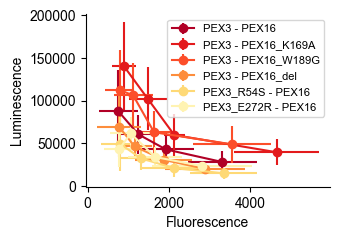

In [67]:
avg_expr_df = avgFL_gr.merge(avgLU_gr,on=['project_id','NL_plasmid_id','mCit_plasmid_id','NL_property','mCit_property'])
avg_expr_df.drop(avg_expr_df.loc[avg_expr_df['NL_property']=='4ng',].index,inplace=True)
plt.figure(figsize=(3.5,2.5))
for plasmid_pair in plasmid_pair_sets[0]:
    sub_df = avg_expr_df.loc[(avg_expr_df['project_id']==plasmid_pair[2]) & 
                             (avg_expr_df['NL_plasmid_id']==plasmid_pair[0]) & 
                             (avg_expr_df['mCit_plasmid_id']==plasmid_pair[1]),]
    sub_df.sort_values('mean_x',inplace=True)
    color = labels_colors[(plasmid_pair[0],plasmid_pair[1])][1]
    label = labels_colors[(plasmid_pair[0],plasmid_pair[1])][0]
    plt.errorbar(sub_df['mean_x'],sub_df['mean_y'],xerr=sub_df['std_x'],yerr=sub_df['std_y'],
                 marker='o',color=color,label=label)

plt.ylabel('Luminescence',fontsize=10)
plt.xlabel('Fluorescence',fontsize=10)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig(path+'PEX3_PEX16_LUvsFL_Lu134r01.pdf')
plt.savefig(path+'PEX3_PEX16_LUvsFL_Lu134r01.jpeg',dpi=300)
plt.show()